# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [25]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [31]:
l = ['banana', 'apple', 'linux', 'pie', 'banana', 'win', 'apple', 'banana']
d={}
for e in l:
    d[e]=d.get(e,0)+1

#d = {e:d.get(e,0)+1 for e in l}# does not work. returns{'banana': 1, 'apple': 1, 'linux': 1, 'pie': 1, 'win': 1}
d
#f=Counter(l)
#f

{'banana': 3, 'apple': 2, 'linux': 1, 'pie': 1, 'win': 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [26]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [32]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [33]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [34]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

No handles with labels found to put in legend.


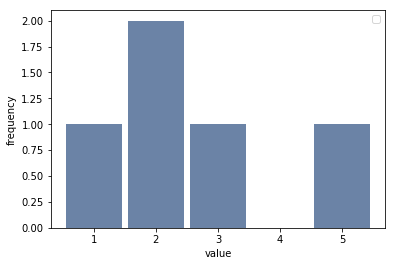

In [36]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [43]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live.head()
live.tail()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,NaN,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,NaN,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000
13592,12571,5,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

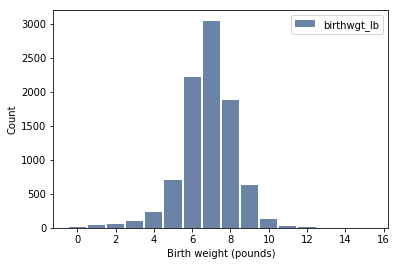

In [44]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [46]:
ages = np.floor(live.agepreg)
ages.head()

0    33.0
1    39.0
2    14.0
3    17.0
4    18.0
Name: agepreg, dtype: float64

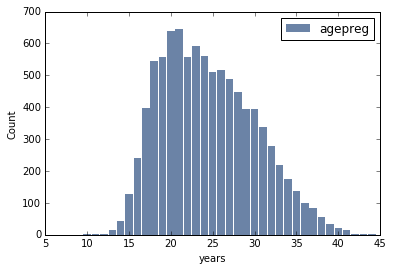

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

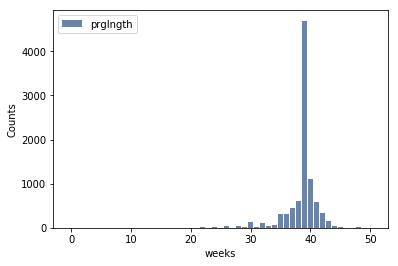

In [51]:
# Solution goes here
gest=live.prglngth
gest.head()
gest_hist=thinkstats2.Hist(gest, label='prglngth')
thinkplot.Hist(gest_hist)
thinkplot.Config(xlabel='weeks', ylabel='Counts')

#gest_first=gest_hist

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [52]:
# Solution goes here
for weeks, freq in gest_hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [53]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

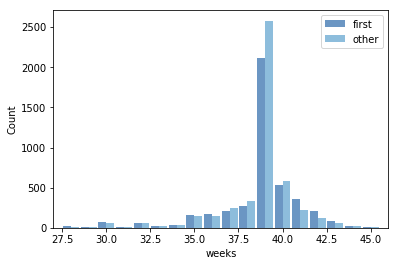

In [55]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [56]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [57]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [60]:
# Solution goes here
if std**2==var:
    print('Your code is good!')
else:
    print('There is something wrong with your code.')

Your code is good!


Here's are the mean pregnancy lengths for first babies and others:

In [61]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [62]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [63]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [65]:
# Solution goes here
CohenEffectSize(firsts.prglngth , others.prglngth)

0.028879044654449883

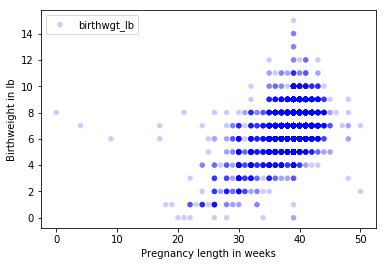

In [123]:
thinkplot.Scatter(live.prglngth, live.birthwgt_lb)
thinkplot.Config(xlabel='Pregnancy length in weeks', ylabel='Birthweight in lb')

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [112]:
# Solution goes here
first_wgt = thinkstats2.Hist(round(firsts.totalwgt_lb), label='first')
other_wgt = thinkstats2.Hist(round(others.totalwgt_lb), label='other')

In [113]:
for weight, freq in first_wgt.Smallest(10):
    print(weight, freq)

0.0 3
1.0 12
2.0 35
3.0 39
4.0 82
5.0 209
6.0 822
7.0 1261
8.0 1285
9.0 422


In [114]:
for weight, freq in first_wgt.Largest(10):
    print(weight, freq)

15.0 1
14.0 2
12.0 13
11.0 21
10.0 156
9.0 422
8.0 1285
7.0 1261
6.0 822
5.0 209


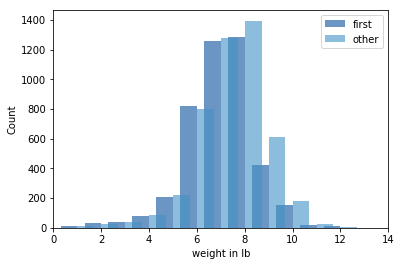

In [115]:
width = 0.7
thinkplot.PrePlot(2)
thinkplot.Hist(first_wgt,  align='right', width=width)
thinkplot.Hist(other_wgt, align='left', width=width)
thinkplot.Config(xlabel='weight in lb', ylabel='Count', xlim=[0, 14])

In [127]:
a=firsts.totalwgt_lb.mean()
b=others.totalwgt_lb.mean()
print(a-b)

-0.12476118453549034


In [126]:
firsts.totalwgt_lb.var(), others.totalwgt_lb.var()
#firsts.totalwgt_lb.std(), others.totalwgt_lb.std()

(2.0180273009157768, 1.9437810258964572)

In [116]:
# Solution goes here
CohenEffectSize(firsts.totalwgt_lb , others.totalwgt_lb)

-0.088672927072602

Suggests that the mean of the others total weight in lb is more than that of the first babies. Hence the negative sign. But the effect is still not very significant - difference is only of about 0.089 or approximately less than 1/10th of a standard deviation.

For the next few exercises, we'll load the respondent file:

In [106]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

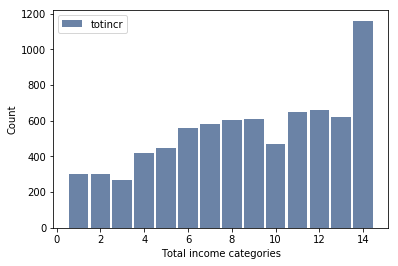

In [109]:
# Solution goes here
resp_inc = thinkstats2.Hist(resp.totincr, label='totincr')
thinkplot.Hist(resp_inc)
thinkplot.Config(xlabel='Total income categories', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

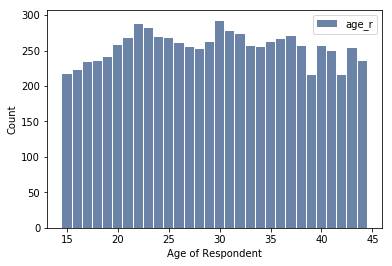

In [110]:
# Solution goes here
resp_age = thinkstats2.Hist(resp.age_r, label='age_r')
thinkplot.Hist(resp_age)
thinkplot.Config(xlabel='Age of Respondent', ylabel='Count')

The above is an example of an uniform distribution.

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

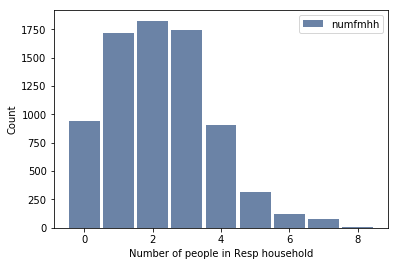

In [111]:
# Solution goes here
resp_numhh = thinkstats2.Hist(resp.numfmhh, label='numfmhh')
thinkplot.Hist(resp_numhh)
thinkplot.Config(xlabel='Number of people in Resp household', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

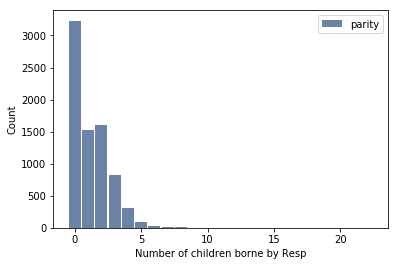

In [128]:
# Solution goes here
resp_par = thinkstats2.Hist(resp.parity, label='parity')
thinkplot.Hist(resp_par)
thinkplot.Config(xlabel='Number of children borne by Resp', ylabel='Count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [129]:
# Solution goes here
for number, freq in resp_par.Largest(10):
    print(number,freq)

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

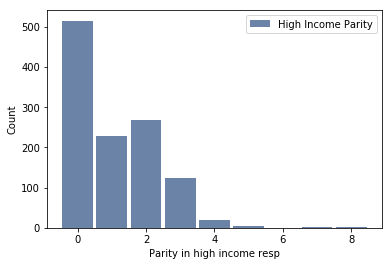

In [131]:
# Solution goes here
resp_inc_par=thinkstats2.Hist(resp.parity[resp.totincr == 14], label="High Income Parity")
thinkplot.Hist(resp_inc_par)
thinkplot.Config(xlabel='Parity in high income resp', ylabel='Count')

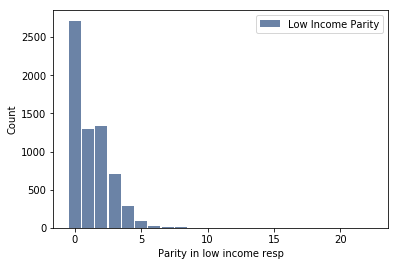

In [134]:
resp_lowinc_par=thinkstats2.Hist(resp.parity[resp.totincr != 14], label="Low Income Parity")
thinkplot.Hist(resp_lowinc_par)
thinkplot.Config(xlabel='Parity in low income resp', ylabel='Count')

Find the largest parities for high income respondents.

In [132]:
# Solution goes here
for number, freq in resp_inc_par.Largest(10):
    print(number,freq)

8 1
7 1
5 5
4 19
3 123
2 267
1 229
0 515


Compare the mean <tt>parity</tt> for high income respondents and others.

In [136]:
# Solution goes here
highs=resp[resp.totincr == 14]
lows=resp[resp.totincr != 14]

In [139]:
highs.parity.mean()-lows.parity.mean()

-0.17371374470099532

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [138]:
# Solution goes here
CohenEffectSize(highs.parity , lows.parity)

-0.1251185531466061